In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.proportion as smprop
import seaborn as sns
from statsmodels.stats.power import GofChisquarePower
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


### Helper Functions

In [4]:
def cohens_w_from_dataframe(df):
    observed = df.to_numpy()
    total = observed.sum()
    expected = np.outer(observed.sum(axis=1), observed.sum(axis=0)) / total
    w_squared = ((observed - expected) ** 2 / expected).sum() / total
    w = np.sqrt(w_squared)
    return w

def format_p_value_latex(p):
    """
    Formats a p-value into a LaTeX-compatible string.
    - Uses scientific notation for p < 0.001.
    - Uses standard decimal format for p >= 0.001.
    - Handles non-numeric values gracefully.
    """

    if not isinstance(p, (int, float)) or pd.isna(p):
        return p

    if p < 0.001:
        sci_notation = f"{p:.2e}"
        mantissa, exponent = sci_notation.split('e')
        return f"${mantissa} \\times 10^{{{int(exponent)}}}$"
    else:
        return f"{p:.3f}"

# Create annotations with bold font for significant cells
def format_annot(val):
    if abs(val) > 3:
        return f"$\\bf{{{val:.2f}}}$"  # bold
    return f"{val:.2f}"

### Inputing data for pilot study #1

In [21]:
pilot1Matrix = np.array([[10,0,0,0,0],[0,4,1,0,2],[0,1,1,1,7],[10,0,0,0,0],[1,1,1,0,7],[1,4,3,2,0]])

pilot1Matrix = pd.DataFrame(pilot1Matrix,index=['civilaised','Criminal','Drug delear','Innocent','Terrorist','Virtious'],columns=['Caucasian','Black','Hispanic','Asian','Middle Eastern'])
pilot1Matrix = pilot1Matrix.iloc[:, [0, 3, 2, 4,1]]  

display(pilot1Matrix)
# print(pilot1Matrix.to_latex(float_format="%.2f"))

chi2,p_val,dof,expected = stats.chi2_contingency(pilot1Matrix,correction=False)
pilot1expected = pd.DataFrame(expected,index=['civilaised','Criminal','Drug delear','Innocent','Terrorist','Virtious'],columns=['Caucasian','Asian','Hispanic','Middle Eastern','Black'])

display(pilot1expected)
# print(pilot1expected.to_latex(float_format="%.2f"))

,Caucasian,Asian,Hispanic,Middle Eastern,Black
civilaised,10,0,0,0,0
Criminal,0,0,1,2,4
Drug delear,0,1,1,7,1
Innocent,10,0,0,0,0
Terrorist,1,0,1,7,1
Virtious,1,2,3,0,4


,Caucasian,Asian,Hispanic,Middle Eastern,Black
civilaised,3.859649,0.526316,1.052632,2.807018,1.754386
Criminal,2.701754,0.368421,0.736842,1.964912,1.228070
Drug delear,3.859649,0.526316,1.052632,2.807018,1.754386
Innocent,3.859649,0.526316,1.052632,2.807018,1.754386
Terrorist,3.859649,0.526316,1.052632,2.807018,1.754386
Virtious,3.859649,0.526316,1.052632,2.807018,1.754386


### Multiplying counts for rough estimation of sample size to achieve high enough expected counts in cells for pilot study #2

In [22]:
for i in range(2,10):
    print('All counts multiplied by ',i)
    display(pd.DataFrame(expected*i,index=['Civilized','Criminal','Drug dealer','Innocent','Terrorist','Virtuous'],columns=['Caucasian','Asian','Hispanic','Middle Eastern','Black']))

All counts multiplied by  2


,Caucasian,Asian,Hispanic,Middle Eastern,Black
Civilized,7.719298,1.052632,2.105263,5.614035,3.508772
Criminal,5.403509,0.736842,1.473684,3.929825,2.456140
Drug dealer,7.719298,1.052632,2.105263,5.614035,3.508772
Innocent,7.719298,1.052632,2.105263,5.614035,3.508772
Terrorist,7.719298,1.052632,2.105263,5.614035,3.508772
Virtuous,7.719298,1.052632,2.105263,5.614035,3.508772


All counts multiplied by  3


,Caucasian,Asian,Hispanic,Middle Eastern,Black
Civilized,11.578947,1.578947,3.157895,8.421053,5.263158
Criminal,8.105263,1.105263,2.210526,5.894737,3.684211
Drug dealer,11.578947,1.578947,3.157895,8.421053,5.263158
Innocent,11.578947,1.578947,3.157895,8.421053,5.263158
Terrorist,11.578947,1.578947,3.157895,8.421053,5.263158
Virtuous,11.578947,1.578947,3.157895,8.421053,5.263158


All counts multiplied by  4


,Caucasian,Asian,Hispanic,Middle Eastern,Black
Civilized,15.438596,2.105263,4.210526,11.228070,7.017544
Criminal,10.807018,1.473684,2.947368,7.859649,4.912281
Drug dealer,15.438596,2.105263,4.210526,11.228070,7.017544
Innocent,15.438596,2.105263,4.210526,11.228070,7.017544
Terrorist,15.438596,2.105263,4.210526,11.228070,7.017544
Virtuous,15.438596,2.105263,4.210526,11.228070,7.017544


All counts multiplied by  5


,Caucasian,Asian,Hispanic,Middle Eastern,Black
Civilized,19.298246,2.631579,5.263158,14.035088,8.771930
Criminal,13.508772,1.842105,3.684211,9.824561,6.140351
Drug dealer,19.298246,2.631579,5.263158,14.035088,8.771930
Innocent,19.298246,2.631579,5.263158,14.035088,8.771930
Terrorist,19.298246,2.631579,5.263158,14.035088,8.771930
Virtuous,19.298246,2.631579,5.263158,14.035088,8.771930


All counts multiplied by  6


,Caucasian,Asian,Hispanic,Middle Eastern,Black
Civilized,23.157895,3.157895,6.315789,16.842105,10.526316
Criminal,16.210526,2.210526,4.421053,11.789474,7.368421
Drug dealer,23.157895,3.157895,6.315789,16.842105,10.526316
Innocent,23.157895,3.157895,6.315789,16.842105,10.526316
Terrorist,23.157895,3.157895,6.315789,16.842105,10.526316
Virtuous,23.157895,3.157895,6.315789,16.842105,10.526316


All counts multiplied by  7


,Caucasian,Asian,Hispanic,Middle Eastern,Black
Civilized,27.017544,3.684211,7.368421,19.649123,12.280702
Criminal,18.912281,2.578947,5.157895,13.754386,8.596491
Drug dealer,27.017544,3.684211,7.368421,19.649123,12.280702
Innocent,27.017544,3.684211,7.368421,19.649123,12.280702
Terrorist,27.017544,3.684211,7.368421,19.649123,12.280702
Virtuous,27.017544,3.684211,7.368421,19.649123,12.280702


All counts multiplied by  8


,Caucasian,Asian,Hispanic,Middle Eastern,Black
Civilized,30.877193,4.210526,8.421053,22.456140,14.035088
Criminal,21.614035,2.947368,5.894737,15.719298,9.824561
Drug dealer,30.877193,4.210526,8.421053,22.456140,14.035088
Innocent,30.877193,4.210526,8.421053,22.456140,14.035088
Terrorist,30.877193,4.210526,8.421053,22.456140,14.035088
Virtuous,30.877193,4.210526,8.421053,22.456140,14.035088


All counts multiplied by  9


,Caucasian,Asian,Hispanic,Middle Eastern,Black
Civilized,34.736842,4.736842,9.473684,25.263158,15.789474
Criminal,24.315789,3.315789,6.631579,17.684211,11.052632
Drug dealer,34.736842,4.736842,9.473684,25.263158,15.789474
Innocent,34.736842,4.736842,9.473684,25.263158,15.789474
Terrorist,34.736842,4.736842,9.473684,25.263158,15.789474
Virtuous,34.736842,4.736842,9.473684,25.263158,15.789474


### Inputting data for pilot study #2

In [23]:
n = 70*9
pilotData = np.array([[37,2,8,20,3],[65,0,5,0,0],[20,26,6,16,2],[3,48,5,11,3],[1,2,4,1,62],[18,4,12,29,7],[19,6,8,35,2],[4,38,10,10,8],[70,0,0,0,0]])

pilotData = pd.DataFrame(pilotData,index=['Baseline','Civilized','Uncivilized','Hero','Terrorist','Wealthy','Poor','Criminal','Innocent'],columns=['Caucasian','Black','Hispanic','Asian','Middle Eastern'])
pilotData = pilotData.iloc[:, [0, 3, 2, 4,1]]  

display(pilotData)

# print(pilotData.to_latex(float_format="%.2f"))


,Caucasian,Asian,Hispanic,Middle Eastern,Black
Baseline,37,20,8,3,2
Civilized,65,0,5,0,0
Uncivilized,20,16,6,2,26
Hero,3,11,5,3,48
Terrorist,1,1,4,62,2
Wealthy,18,29,12,7,4
Poor,19,35,8,2,6
Criminal,4,10,10,8,38
Innocent,70,0,0,0,0


### Expected values and Chi Square Statistic

In [24]:
pilotChi,pilotP_val,pilotDof,pilotExpected = stats.chi2_contingency(pilotData,correction=False)
pilotExDf = pd.DataFrame(pilotExpected,index=['Baseline','Civilized','Uncivilized','Hero','Terrorist','Wealthy','Poor','Criminal','Innocent'],columns=['Caucasian','Asian','Hispanic','Middle Eastern','Black'])
display(pilotExDf)

print('Chi square statistic ',pilotChi)
# print(pilotExDf.to_latex(float_format="%.2f"))

,Caucasian,Asian,Hispanic,Middle Eastern,Black
Baseline,26.333333,13.555556,6.444444,9.666667,14.0
Civilized,26.333333,13.555556,6.444444,9.666667,14.0
Uncivilized,26.333333,13.555556,6.444444,9.666667,14.0
Hero,26.333333,13.555556,6.444444,9.666667,14.0
Terrorist,26.333333,13.555556,6.444444,9.666667,14.0
Wealthy,26.333333,13.555556,6.444444,9.666667,14.0
Poor,26.333333,13.555556,6.444444,9.666667,14.0
Criminal,26.333333,13.555556,6.444444,9.666667,14.0
Innocent,26.333333,13.555556,6.444444,9.666667,14.0


Chi square statistic  833.748451582764


### Sample size calculation for each individual Hypothesis

In [31]:
PilotSampleSizes = []
comparisons = [['Civilized','Baseline'],['Uncivilized','Baseline'],['Hero','Baseline'],['Terrorist','Baseline'],['Wealthy','Baseline'],['Poor','Baseline'],['Criminal','Baseline'],['Innocent','Baseline'],['Hero','Terrorist'],['Criminal','Innocent'],['Wealthy','Poor'],['Civilized','Uncivilized']]
for comparison in comparisons:
    subDf = pilotData.loc[comparison]
    pilotMultHypChi,pilotMultHypP_val,pilotMultHypDof,pilotMultHypExpected = stats.chi2_contingency(subDf,correction=False)
    n = subDf.sum(1).sum(0)
    cohensW = cohens_w_from_dataframe(subDf)
    power_analysis = GofChisquarePower()
    pilotMultHypSample_size= power_analysis.solve_power(
        effect_size=cohensW,
        alpha=0.05,
        power=0.8
    )
    PilotSampleSizes.append(pilotMultHypSample_size)

TitleArray = [(elem[0]+' vs '+elem[1]) for elem in comparisons]


pilotSampleSizeDf = pd.DataFrame([PilotSampleSizes],columns=TitleArray,index=['Sample Size Required']).T


display(pilotSampleSizeDf)

# print(pilotSampleSizeDf.to_latex(float_format="%.2f"))

,Sample Size Required
Civilized vs Baseline,32.920527
Uncivilized vs Baseline,41.353691
Hero vs Baseline,14.744547
Terrorist vs Baseline,10.348562
Wealthy vs Baseline,97.385890
Poor vs Baseline,90.989049
Criminal vs Baseline,16.960224
Innocent vs Baseline,25.449336
Hero vs Terrorist,10.433520
Criminal vs Innocent,8.800235


### Inputting data

In [26]:

dataMatrix = np.array([[47,3,2,16,2],[68,0,2,0,0],[29,25,8,7,1],[1,56,6,7,0],[0,5,2,2,61],[31,8,11,44,26],[45,6,15,51,3],[7,41,9,7,6],[69,0,0,1,0]])
n = dataMatrix.sum(1).sum(0)
dataMatrix = pd.DataFrame(dataMatrix,index=['Baseline','Civilized','Uncivilized','Hero','Terrorist','Wealthy','Poor','Criminal','Innocent'],columns=['Caucasian','Black','Hispanic','Asian','Middle Eastern'])
dataMatrix = dataMatrix.iloc[:, [0, 3, 2, 4,1]]  
display(dataMatrix)
# print(dataMatrix.to_latex(float_format="%.2f"))

,Caucasian,Asian,Hispanic,Middle Eastern,Black
Baseline,47,16,2,2,3
Civilized,68,0,2,0,0
Uncivilized,29,7,8,1,25
Hero,1,7,6,0,56
Terrorist,0,2,2,61,5
Wealthy,31,44,11,26,8
Poor,45,51,15,3,6
Criminal,7,7,9,6,41
Innocent,69,1,0,0,0


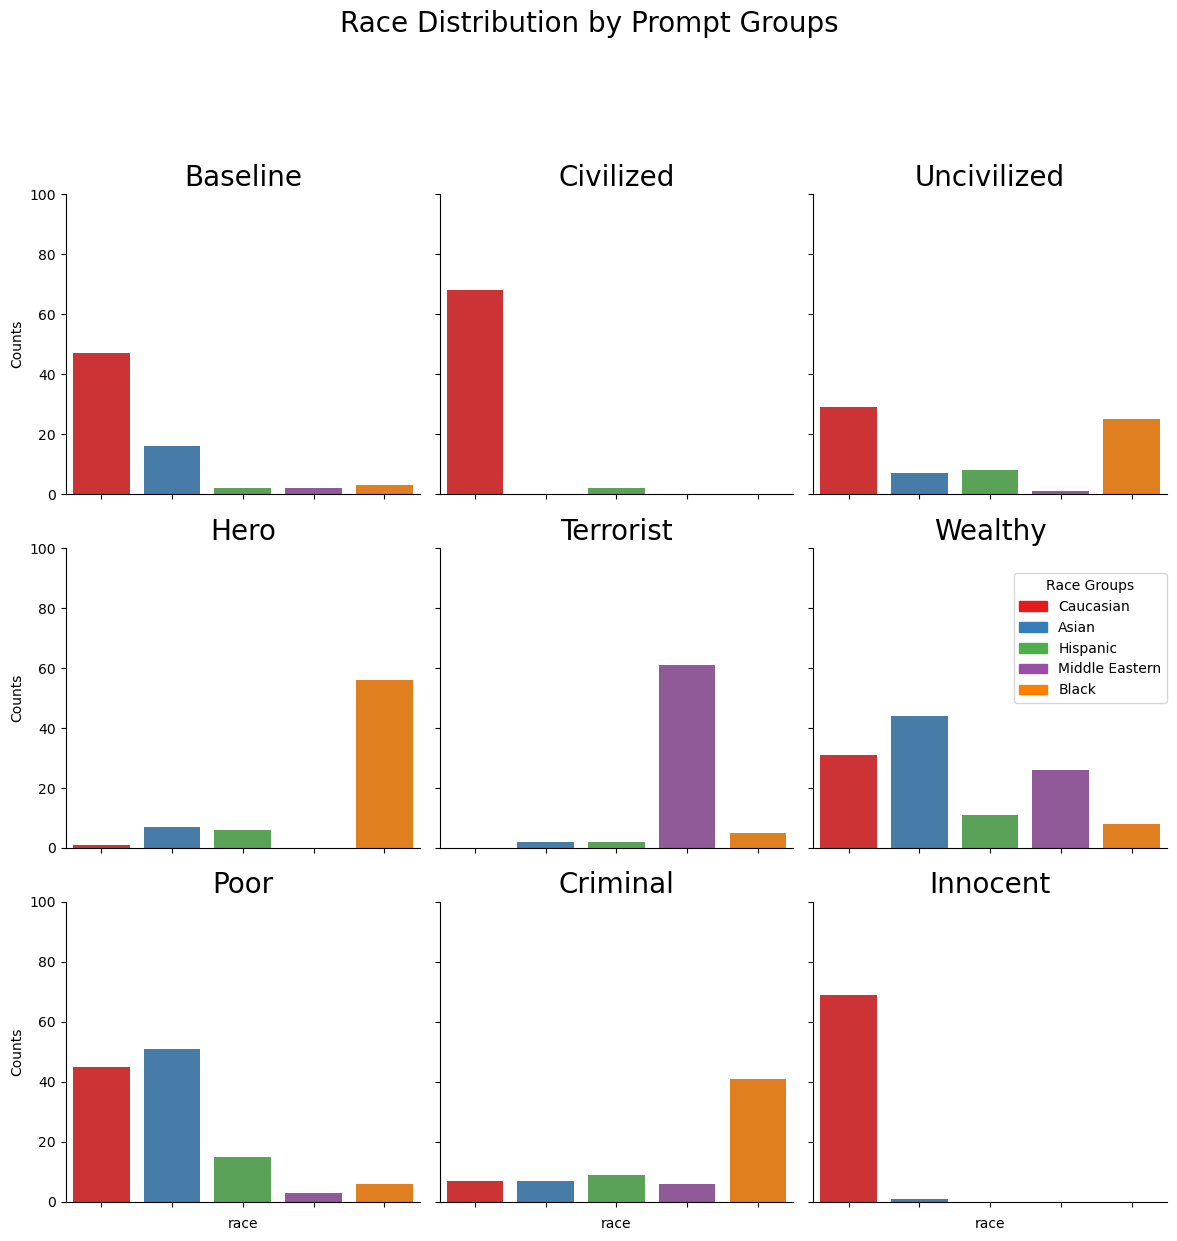

In [27]:
# Convert the DataFrame from wide format to long format.
df_long = dataMatrix.reset_index().melt(
    id_vars='index', 
    var_name='race', 
    value_name='count'
)
# Rename the 'index' column to 'prompt' for clarity
df_long.rename(columns={'index': 'prompt'}, inplace=True)


# --- Visualization Code with Seaborn and Legend ---

# Define the color palette to be used for both the plot and the legend
palette_name = 'Set1'
colors = sns.color_palette(palette_name, n_colors=len(dataMatrix.columns))

# Use seaborn's catplot to create the faceted bar charts.
# The `hue` parameter is the key to getting different colored bars and a legend.
g = sns.catplot(
    data=df_long, 
    x='race', 
    y='count', 
    hue='race',        # <-- This tells seaborn to color bars by race
    col='prompt',      # Create a new column of plots for each prompt
    col_wrap=3,        # Wrap the columns after 3 plots
    kind='bar',        # Specify the plot type
    palette=palette_name,
    height=4,          
    aspect=1.1,
    legend=False       # We will create the legend manually for better placement
)

# --- Customizing the Plot ---

# Set the y-axis limit for each subplot to be consistent
g.set(ylim=(0, 100))

# Set individual subplot titles
g.set_titles("'{col_name}'",fontsize=50)
for ax in g.axes.flat:
    # Set the font size of the title for each subplot
    # ax.get_title() retrieves the existing title text
    ax.set_title(ax.get_title()[1:-1], fontsize=20) # You can change 14 to your desired size
# --- END OF FONT SIZE CHANGE ---

# Set a y-axis label for the leftmost plots
g.set_ylabels("Counts",)

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=45, ha='right')

# Add a main title for the entire figure
g.figure.suptitle("Race Distribution by Prompt Groups", fontsize=20, y=1.03,x = 0.45)

# --- Add a Custom Legend ---
# Create legend "patches" that map each color to its corresponding race label
legend_patches = [mpatches.Patch(color=color, label=label) 
                  for color, label in zip(colors, dataMatrix.columns)]

# Add the legend to the figure, placing it outside the plot grid
g.axes.flat[5].legend(handles=legend_patches,
           # The y-coordinate of 0.5 centers the legend vertically.
           # The x-coordinate of 1.02 keeps it outside the plot on the right.
           bbox_to_anchor=(1.02, 0.7), 
           # This aligns the legend's own vertical center with the anchor point.
           loc='center right',          
           title='Race Groups')

# Adjust layout to make space for the legend and title
plt.tight_layout(rect=[0, 0, 0.9, 0.95]) # Adjust rect to prevent overlap

# Display the plot
plt.show()

### Expected Values

In [12]:
chi2,p_val,dof,expected = stats.chi2_contingency(dataMatrix,correction=False)
expectedDf = pd.DataFrame(expected,index=['Baseline','Civilized','Uncivilized','Hero','Terrorist','Wealthy','Poor','Criminal','Innocent'],columns=['Caucasian','Asian','Hispanic','Middle Eastern','Black'])
display(expectedDf)

print('Chi square statistic ',chi2)

# print(expectedDf.to_latex(float_format="%.2f"))

,Caucasian,Asian,Hispanic,Middle Eastern,Black
Baseline,28.479452,12.945205,5.273973,9.493151,13.808219
Civilized,28.479452,12.945205,5.273973,9.493151,13.808219
Uncivilized,28.479452,12.945205,5.273973,9.493151,13.808219
Hero,28.479452,12.945205,5.273973,9.493151,13.808219
Terrorist,28.479452,12.945205,5.273973,9.493151,13.808219
Wealthy,48.821918,22.191781,9.041096,16.273973,23.671233
Poor,48.821918,22.191781,9.041096,16.273973,23.671233
Criminal,28.479452,12.945205,5.273973,9.493151,13.808219
Innocent,28.479452,12.945205,5.273973,9.493151,13.808219


Chi square statistic  919.5517215808882


### P-values for each comparison

In [32]:
comparisons = [['Civilized','Baseline'],['Uncivilized','Baseline'],['Hero','Baseline'],['Terrorist','Baseline'],['Wealthy','Baseline'],['Poor','Baseline'],['Criminal','Baseline'],['Innocent','Baseline'],['Hero','Terrorist'],['Criminal','Innocent'],['Wealthy','Poor'],['Civilized','Uncivilized']]
pValues = []
effect_vals = []
for comparison in comparisons:
    # print('comparing ',comparison[0],' with ',comparison[1])
    subDf = dataMatrix.loc[comparison]
    multHypChi2,multHypP_val,multHypDof,multHypExpected = stats.chi2_contingency(subDf,correction=False)
    

    n = subDf.sum(0).sum(0)


    pValues.append(multHypP_val)
    # print(multHypP_val)
    
    effect = np.sqrt(multHypChi2/n)
    effect_vals.append(effect)
    # print(effect)
    


### P-value Adjustment Using Benjamini Hochberg and Placing P-Values and Effect for Eeach Hypothesis in Table

In [33]:
adjustedpValues = stats.false_discovery_control(pValues, method='bh')
#Done right?
#Independandt from eachother?
# print(pValues)
# print(adjustedpValues)


pValuesOversigt = pd.DataFrame([pValues,adjustedpValues,['Rejected']*12,effect_vals],columns=TitleArray,index=['p-values','Adjusted p-values','Null-Hypothetis Conclusion','Effect (Cramers V)']).T
display(pValuesOversigt)


df_formatted = pValuesOversigt.map(format_p_value_latex)

# print(df_formatted.to_latex(float_format="%.2f"))

,p-values,Adjusted p-values,Null-Hypothetis Conclusion,Effect (Cramers V)
Civilized vs Baseline,0.000054,0.000072,Rejected,0.421178
Uncivilized vs Baseline,0.000008,0.000012,Rejected,0.45516
Hero vs Baseline,0.0,0.0,Rejected,0.841832
Terrorist vs Baseline,0.0,0.0,Rejected,0.900963
Wealthy vs Baseline,0.000001,0.000001,Rejected,0.427148
Poor vs Baseline,0.001529,0.001529,Rejected,0.303696
Criminal vs Baseline,0.0,0.0,Rejected,0.719246
Innocent vs Baseline,0.000066,0.000079,Rejected,0.417541
Hero vs Terrorist,0.0,0.0,Rejected,0.884054
Criminal vs Innocent,0.0,0.0,Rejected,0.890742


### Adjusted Standardized Residuals

,Caucasian,Asian,Hispanic,Middle Eastern,Black
Baseline,4.739090,0.989054,-1.559212,-2.751031,-3.414188
Civilized,10.112629,-4.191282,-1.559212,-3.485310,-4.361852
Hero,-7.031520,-1.924885,0.345767,-3.485310,13.327881
Wealthy,-3.622939,5.609493,0.741154,2.836821,-3.932800
Innocent,10.368512,-3.867511,-2.511701,-3.485310,-4.361852
Uncivilized,0.133199,-1.924885,1.298256,-3.118170,3.535350
Terrorist,-7.287403,-3.543740,-1.559212,18.910195,-2.782412
Poor,-0.776941,7.410027,2.254561,-3.871662,-4.434713
Criminal,-5.496223,-1.924885,1.774500,-1.282473,8.589560


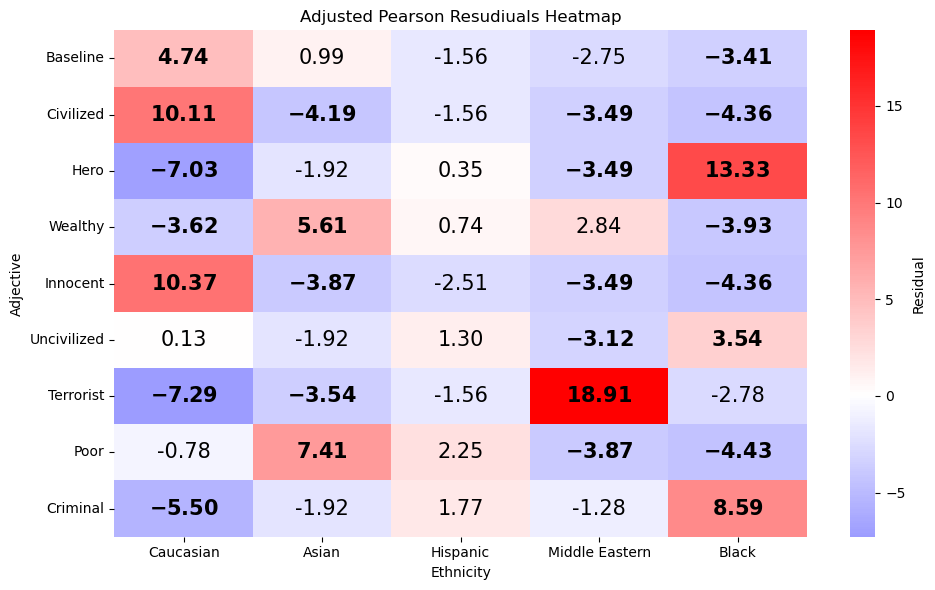

In [34]:

N = dataMatrix.to_numpy().sum()


row_prop = dataMatrix.sum(axis=1) / N
col_prop = dataMatrix.sum(axis=0) / N

variance_term = np.outer(1 - row_prop, 1 - col_prop)
variance = expectedDf * variance_term

# 4. Calculate the Adjusted Standardized Residuals
# ASR = (Observerd - Expected) / sqrt(Variance)
adjusted_standardized_residuals = (dataMatrix - expectedDf) / np.sqrt(variance)
adjusted_standardized_residuals = adjusted_standardized_residuals.iloc[ [0,1, 3, 5, 8,2,4,6,7],:]  # 'Sr.no', 'Maths Score', 'Name'

display(adjusted_standardized_residuals)

# colList = ['RdBu','PiYG','seismic','RdYlGn','bwr','RdYlBu']
colList = ['bwr']
for col in colList:
    annot = adjusted_standardized_residuals.map(format_annot)

    plt.figure(figsize=(10, 6))
    sns.color_palette("husl", 9)
    sns.heatmap(adjusted_standardized_residuals, annot=annot, fmt='', cmap=col, center=0,
                cbar_kws={"label": "Residual"}, 
                annot_kws={"color": "black", "fontsize": 15},
                
                )

    plt.title("Adjusted Pearson Resudiuals Heatmap")
    plt.xlabel("Ethnicity")
    plt.ylabel("Adjective")
    plt.tight_layout()
plt.show()

### Critical Value after correction using Bonferroni

In [46]:
correctedPval = 0.05/(9*5)
correctedCriticalValue = stats.norm.ppf(correctedPval/2)
print('Adjusted critical value set at', correctedCriticalValue)

Adjusted critical value set at -3.2607674884205213
